# Verinin içeri aktarılması ve hızlıca tanıtılması
- Bu bölümde "Ortapetik hastaların biyomekanik özellikleri" veri setinin kullanacağız.
- Bu veri seti içerisnde kemik özellikleri ve bu özellikler sonucunda hastanın normal ya da normal olmamasını sınıflarını içeriyor.
- Verinin içerisinde bulunan özelliklerin ismi :


1.   pelvic tilt = pelvik eğim
2.   lumbar lordosis angle = lomber lardoz açısı
3.   sacral slope = sakral eğim
4.   pelvic incidence = pelvik insidans
5.   pelvic radius = pelvik yarıçap
6.   grade of spondylolisthesis = spondilolistez derecesi





In [1]:
# kütüphanelerin içeri aktarılması 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#veriyi içeri aktaralım:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


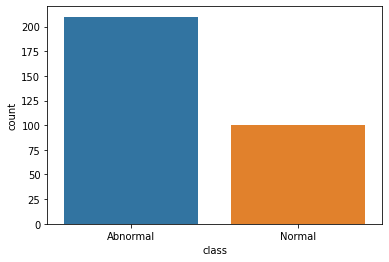

In [3]:
sns.countplot(data["class"])
plt.show()

In [4]:
data["class"]= [1 if each =="Abnormal" else 0 for each in data ["class"]]
data.head()
#scikit learn'ün istediği formata getirebilmek için 0 ve 1 ile doldurduk.

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [5]:
# artık tamamen sayısal değiişkenlerden oluşa veri setine sahibiz. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [6]:
y=data["class"].values #sınıfları y değişkeni içerisine koyalım
x_data=data.drop(["class"],axis=1) #özellikleri x_data içerisine atadık

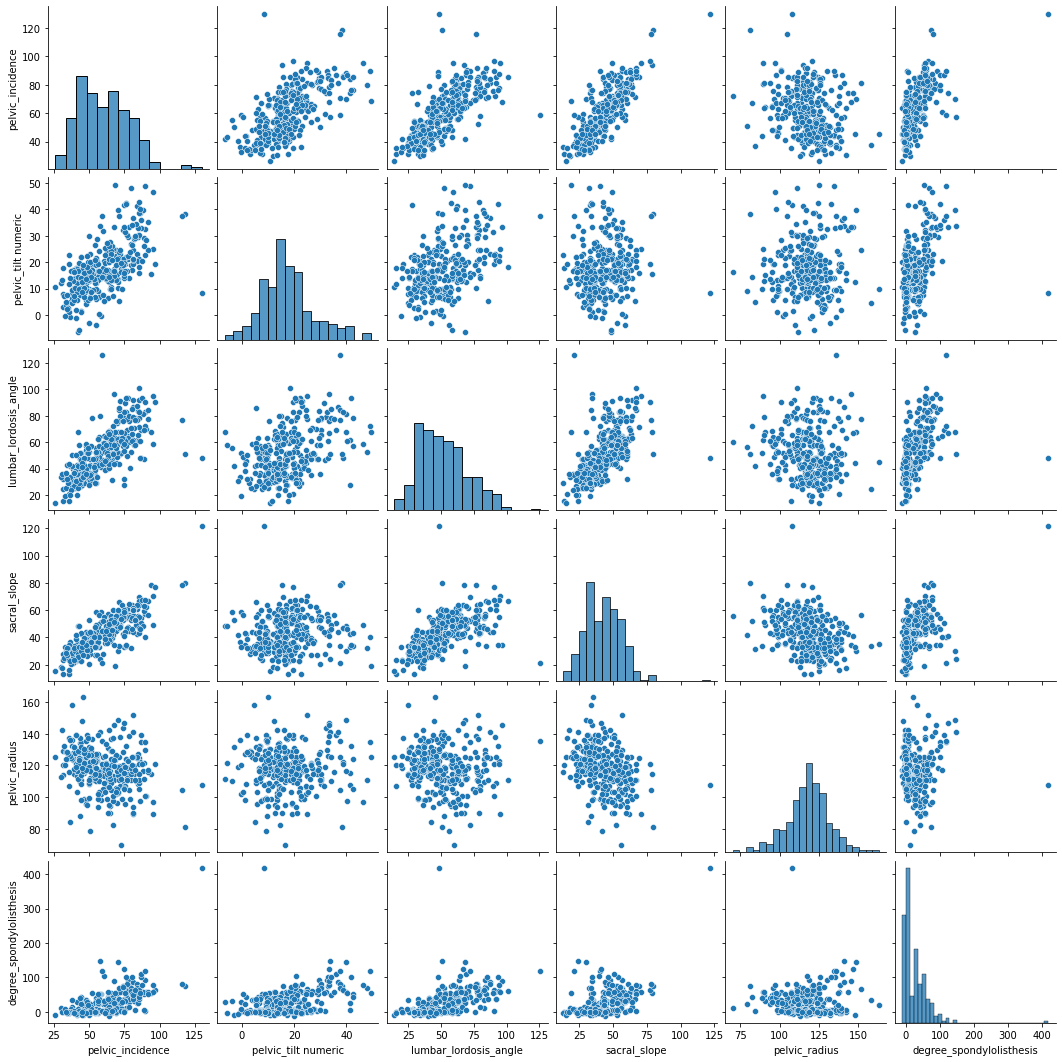

In [7]:
sns.pairplot(x_data)
plt.show()

### Veriyi Normalize Etmek

In [8]:
#normalizasyon: 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

### Eğitim/Test Bölünmesi 

In [9]:
# eğitim test bölünmesi

from sklearn.model_selection import train_test_split


In [10]:
# %15 test, % 85 eğitim 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)

#transpose alıyoruz 


x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


print("x_train:" , x_train.shape)
print("x_test:" , x_test.shape)
print("y_train:" , y_train.shape)
print("y_test:" , y_test.shape)

x_train: (6, 263)
x_test: (6, 47)
y_train: (263,)
y_test: (47,)


# Sklearn ile Lojistik Regresyon Modeli Eğitimi ve Testi 

In [11]:
#sklearn küütüphanesini içeri aktar 

from sklearn.linear_model import LogisticRegression

In [12]:
#eğitim
lr= LogisticRegression()
lr.fit(x_train.T, y_train.T)

LogisticRegression()

In [13]:
# test 
test_dogrulugu =lr.score(x_test.T, y_test.T)
print("Test Doğrulugu: {} ".format(test_dogrulugu))

Test Doğrulugu: 0.8297872340425532 


# K-En Yakın Komşu 

In [14]:
# Kütüphaneleri aktar :
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [15]:
#veriyi içeri aktaralım:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/machine_learning/ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal


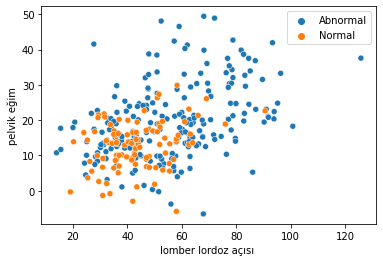

In [16]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", y="pelvic_tilt numeric", hue="class")
plt.xlabel("lomber lordoz açısı ")
plt.ylabel("pelvik eğim")
plt.legend()
plt.show()

- görüldüğü üzere  K- en yakın komşu algoritması için zor bir problem olabilir çünkü abnormal ve normal sınıflar iki boyutta iç içe geçmiş. (iki boyut kesin bir kanıya varmamız için yeterli değildir ama ilk izlenim açısından faydalıdır.)

In [17]:
data["class"]= [1 if each =="Abnormal" else 0 for each in data ["class"]]
data.head()
#scikit learn'ün istediği formata getirebilmek için 0 ve 1 ile doldurduk.

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [18]:
y=data["class"].values #sınıfları y değişkeni içerisine koyalım
x_data=data.drop(["class"],axis=1) #özellikleri x_data içerisine atadık

In [19]:
#normalizasyon: 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [20]:
# eğitim test bölünmesi

from sklearn.model_selection import train_test_split

# %15 test, % 85 eğitim 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)



### K en yakın komşu algoritmasının eğitimi ve Testi 

In [21]:
# knn model 
from sklearn.neighbors import KNeighborsClassifier 

komsu_sayisi = 4 
knn= KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train,y_train)

prediction=knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluk {} ".format(komsu_sayisi,knn.score(x_test, y_test)))


4 En Yakın Komşu Modeli Test Doğruluk 0.6382978723404256 
